In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
etc = pd.read_csv('naver_kakao_dataframe.csv',encoding = 'utf-8')

In [3]:
len(etc)

538

In [4]:
etc.head()

,Unnamed: 0,title,contents
0,0,"카카오, 최대 매출에 주가 '호조'… 증권가 ""목표주가 상향""",사진=카카오카카오가 지난 5일 올해 3분기 매출이 1조원을 넘겼다고 알린 가운데 지...
1,1,[오늘의 목표주가]카카오·원익IPS 등 내년 호실적 지속 전망에 목표주가 ‘UP’,현대백화점·대한항공도 업황 회복세 긍정적[서울경제] 국내 증권사들은 전일 3·4분기...
2,2,"호실적에도 거품논란… '따따상'하던 카카오게임즈 주가, 왜 떨어졌나?",글로벌 멀티플랫폼 게임 기업 카카오게임즈가 4일 2020년 3분기 호실적을 기록했다...
3,3,네이버·카카오 3분기 실적도 '맑음'…주가 반등 나설까,[머니투데이 김영상 기자] 국내 비대면 대표주 네이버와 카카오가 3분기 실적을 바탕...
4,4,[경제 브리핑] 기관 ‘팔자’에 카카오게임즈 주가 7% 뚝,12일 코스닥 시장에서 카카오게임즈는 전 거래일보다 7.36% 하락한 4만9100원...


In [5]:
etc2 = list(etc.title)

etc2[0:2]

['카카오, 최대 매출에 주가 \'호조\'… 증권가 "목표주가 상향"',
 '[오늘의 목표주가]카카오·원익IPS 등 내년 호실적 지속 전망에 목표주가 ‘UP’']

In [6]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['카카오 최대 매출에 주가 호조… 증권가 목표주가 상향']

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()

In [8]:
import time
import datetime
start = time.time()

In [9]:
dataset = []
for i in range(len(clean_title)) :
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]', '', clean_title[i])))

sec = time.time()-start
times = str(datetime.timedelta(seconds = sec)).split(".")
times = times[0]
print(times)

0:00:52


In [10]:
clean_title2 = []
for i in range(len(clean_title)) :
    clean_title2.append(re.sub('주차',' ',clean_title[i]))
clean_title3 = []
for i in range(len(clean_title2)):
    clean_title3.append(re.sub('스마트', ' ', clean_title2[i]))
clean_title4 = []
for i in range(len(clean_title3)):
    clean_title4.append(re.sub('민영화', ' ', clean_title3[i]))
clean_title5 = []
for i in range(len(clean_title4)):
    clean_title5.append(re.sub('너무', ' ', clean_title4[i]))
clean_title6 = []
for i in range(len(clean_title5)):
    clean_title6.append(re.sub('요즘', ' ', clean_title5[i]))
clean_title7 = []
for i in range(len(clean_title6)):
    clean_title6.append(re.sub('돌림판', ' ', clean_title5[i]))

In [15]:
!pip install gensim

In [11]:
from gensim import corpora, models
import gensim

In [12]:
high_score_reviews = dataset

In [13]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                     for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [14]:
import matplotlib.pyplot as ply
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

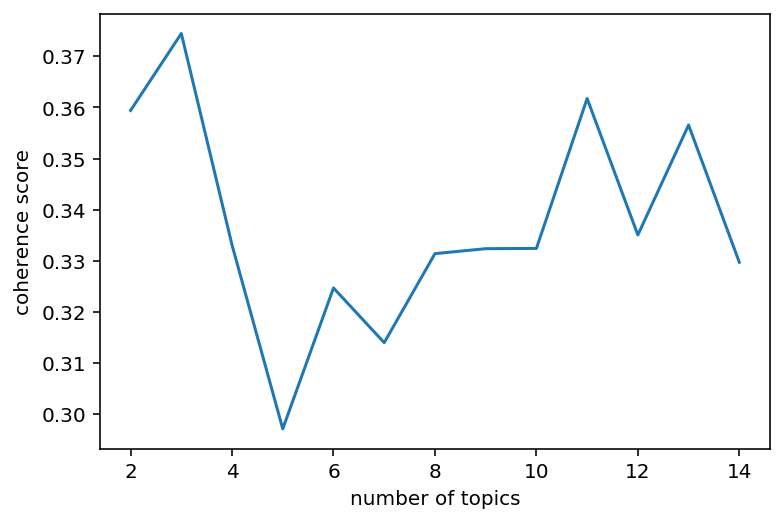

In [16]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [17]:
perplexity_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

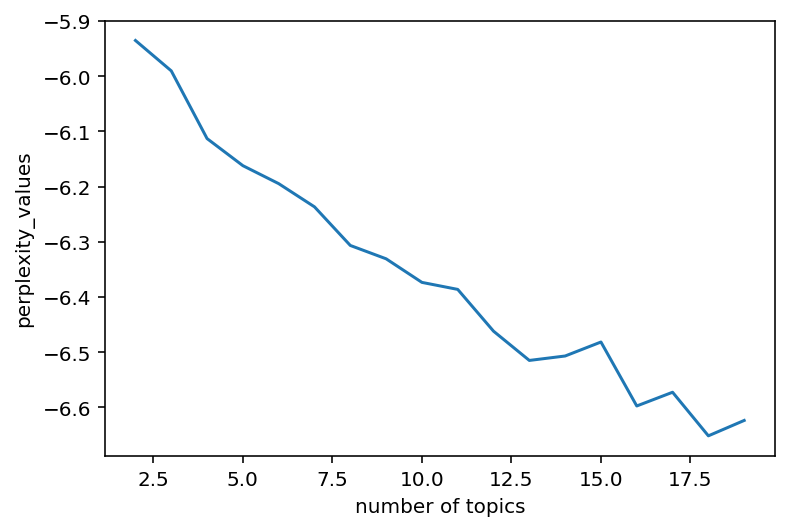

In [18]:
x=range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity_values")
plt.show()

In [19]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=11, alpha=0.1, id2word = dictionary)

In [20]:
ldamodel.print_topics(num_words=10)

[(0,
  '0.079*"카카오" + 0.079*"주가" + 0.024*"목표" + 0.012*"만원" + 0.012*"상승" + 0.012*"종목카카오" + 0.012*"종목" + 0.012*"클릭" + 0.010*"다음카카오" + 0.010*"다음"'),
 (1,
  '0.108*"카카오" + 0.106*"주가" + 0.022*"다음카카오" + 0.021*"다음" + 0.019*"목표" + 0.010*"만원" + 0.009*"급등" + 0.009*"영향" + 0.009*"상승" + 0.008*"실적"'),
 (2,
  '0.101*"주가" + 0.099*"카카오" + 0.016*"뱅크" + 0.014*"실적" + 0.012*"증권" + 0.011*"상승" + 0.011*"카카오뱅크" + 0.010*"목표" + 0.009*"카카오게임즈" + 0.009*"게임"'),
 (3,
  '0.100*"카카오" + 0.099*"주가" + 0.032*"목표" + 0.021*"증권" + 0.021*"상승" + 0.020*"투자" + 0.019*"목표주가" + 0.011*"다음" + 0.010*"다음카카오" + 0.009*"분기"'),
 (4,
  '0.035*"주가" + 0.034*"카카오" + 0.019*"뱅크" + 0.017*"은산" + 0.017*"규제" + 0.017*"분리" + 0.017*"완화" + 0.017*"은산분리" + 0.014*"카카오뱅크" + 0.011*"기대감"'),
 (5,
  '0.045*"카카오" + 0.044*"주가" + 0.028*"게임" + 0.028*"카카오게임즈" + 0.011*"시그널" + 0.011*"만원" + 0.010*"수익률" + 0.010*"적정주가" + 0.010*"적정" + 0.006*"상승"'),
 (6,
  '0.097*"주가" + 0.096*"카카오" + 0.029*"다음" + 0.022*"다음카카오" + 0.019*"실적" + 0.017*"상승" + 0.014*"분기" + 0.013*"목표" + 0.013*"반등

In [21]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.073091 -0.031123       1        1  28.474422
1     -0.067841  0.065404       2        1  16.182039
3     -0.081428 -0.075738       3        1  13.729443
2     -0.039651  0.033237       4        1  10.502401
6     -0.071792  0.062666       5        1   8.956580
0     -0.004830 -0.086814       6        1   5.625614
10     0.030449 -0.009652       7        1   5.394714
7      0.038211  0.021831       8        1   3.335971
5      0.104489 -0.057197       9        1   2.914816
4      0.108307  0.047017      10        1   2.819724
9      0.057176  0.030369      11        1   2.064265, topic_info=      Term        Freq       Total Category  logprob  loglift
4       주가  426.000000  426.000000  Default  30.0000  30.0000
7      카카오  428.000000  428.000000  Default  29.0000  29.0000
19      게임   33.000000   33.000000  Default  28.0000  28.0000
21  카카오게임즈   28.000000   28.000000  Default  27.0000  27.0000
1       목표   94.000000   94.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
7      카카오    4.126913  428.266479  Topic11  -3.1083  -0.7618
1       목표    1.216802   94.847527  Topic11  -4.3296  -0.4756
11      실적    0.634832   44.303463  Topic11  -4.9803  -0.3651
2     목표주가    0.634829   49.218712  Topic11  -4.9803  -0.4703
24      반등    0.634782   19.847891  Topic11  -4.9803   0.4378

[663 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
415       3  0.468047      가능성
415       4  0.234024      가능성
415       5  0.117012      가능성
415       6  0.117012      가능성
1024      3  0.581947  가능성목표주가
...     ...       ...      ...
1011      2  0.629731       확장
794       2  0.629739     확정주가
386       2  0.629736     희비교차
55        6  0.441980       희석
55        9  0.441980       희석

[1005 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 4, 3, 7, 1, 11, 8, 6, 5, 10])

In [34]:
pyLDAvis.save_html(vis, 'topicmodeling-daum_kakao.html')

In [44]:
kk = ldamodel.show_topic(10, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(3)

,0,1
0,카카오,0.028184
1,뱅크,0.020575
2,금융,0.018027


In [38]:
kk2.to_csv('top5.csv', encoding="euc-kr")

In [43]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key =lambda x: (x[1]), reverse= True)
        
        
        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index = True)
            else:
                break
    return(topic_table)

In [44]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

,문서번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.9603,"[(5, 0.9603083)]"
1,1,4.0,0.9418,"[(0, 0.011629428), (1, 0.011629567), (2, 0.011..."
2,2,4.0,0.5805,"[(4, 0.58051276), (5, 0.3900697)]"
3,3,1.0,0.9569,"[(1, 0.9568874)]"
4,4,5.0,0.8611,"[(0, 0.027788874), (1, 0.027786823), (2, 0.027..."
5,5,0.0,0.9528,"[(0, 0.9528217)]"
6,6,1.0,0.7475,"[(0, 0.01041821), (1, 0.7474807), (2, 0.010418..."
7,7,0.0,0.5267,"[(0, 0.52671385), (1, 0.420642), (2, 0.0131602..."
8,8,4.0,0.7866,"[(0, 0.01163), (1, 0.16686413), (2, 0.01162921..."
9,9,3.0,0.9342,"[(0, 0.013159871), (1, 0.01315929), (2, 0.0131..."


In [45]:
topictable.to_csv("토픽테이블.csv", encoding = "euc-kr", index = False)